# **Project Name**  -  **Play Store App Review Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual

#**Project Summary Link**

Smartphone applications are widely available. They are easy to design and may be lucrative, because of these two characteristics, more and more applications are being developed. In this notebook, we'll compare more than 10,000 apps from different categories in the Google Play store to conduct a thorough analysis of the Android app industry.

There is a vast amount of data in the Google Play Store app dataset that may be leveraged to provide insightful analyses. Success and user engagement are greatly influenced by several critical aspects. Comparing our issue statement to the current App market on the Google Play store, it is essentially inevitable. To identify all the critical elements influencing app engagement and success, two datasets—one containing basic information and the other user reviews—are offered for exploration and analysis.

After doing an extensive study, it was discovered that the Google Play store library is growing by more than 3000 applications every day. Hence, conclusions for company improvements may be drawn from vast datasets & a range of insights.


https://docs.google.com/document/d/1IWGKnw51Qn9Ln8dF2WQpEdyg7YHTjQZ6EhkTJtg1vx4/edit?usp=sharing


# **Github Repo Link**
https://github.com/Nagendra-hash/EDA--Playstore-data-analysis-capstone-project


# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success.

We will analyze the following observation before moving on to the data.
1.Checking Corelation 
2. Getting the average Rating of the Apps
3.Total number of application in each category
4.Check the number of installs in each Category
5. Getting App Size Distribution
6. Check the number of installs on the basis of there size
7.Lets check the app on the basis of price in playstore.(Free or Paid)
8. lets compare Category according to there Installs
9. Category and Rating
10. Category and Reviews
11. Review sentiments in all the app dataset
12.Let's see a more depth understanding of sentiment Polarity and Subjectivity.
13.Does sentiments Polarity is proportional to sentiments subjectivity.
14. Sentiment analysis of user reviews
15. Word Cloud



#### **Define Your Business Objective?**

***The business objective of conducting an EDA of Play Store app reviews is to gain insights into the user feedback and ratings for a particular app or group of apps. By analyzing the reviews, businesses can understand user sentiment, identify areas for improvement, and make data-driven decisions to improve the overall user experience and drive user engagement.***

## **Introduction**

In this project we have to analyze the key factors responsible for app engagement and success of the apps. For this, we have been given 2 datasets for analysing.

* Playstore Data
* User Review Data 

To come to a conclusion we use Python and its libraries, Pandas & Numpy for Data Manipulation, and Matplotlib & seaborn for visualisation of different datas.



# ***Playstore Analysis EDA***

## Importing libraries

In [ ]:
#Mounting the Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing python libraries for analysis
import numpy as np                     # for data manipulation
import pandas as pd                    # for mathematical operation and linear algebra
import matplotlib.pyplot as plt        # for data visualisation
import seaborn as sns                  # making statistical graphics
import plotly.express as px
import missingno as msno              
%matplotlib inline
from wordcloud import WordCloud
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
# Define a function which can load dataset 
def read_csv_files_with_pandas(file_paths):
    """
    Reads multiple CSV files with pandas and returns their contents as separate DataFrames.
    
    :param file_paths: A list of file paths for the CSV files.
    :return: A dictionary where the keys are the filenames and the values are the corresponding DataFrames.
    """
    dataframes = {}
    for file_path in file_paths:
        filename = file_path.split('/')[-1]
        df = pd.read_csv(file_path)
        dataframes[filename] = df
    return dataframes
csv_file_paths = ['/content/drive/MyDrive/project/Alma Project/EDA---Playstore-data-analysis-capstone-project-main/Play Store Data.csv', '/content/drive/MyDrive/project/Alma Project/EDA---Playstore-data-analysis-capstone-project-main/User Reviews.csv']
csv_dataframes = read_csv_files_with_pandas(csv_file_paths)



In [ ]:
# Here we load both dataset
ps = csv_dataframes['Play Store Data.csv']
ur = csv_dataframes['User Reviews.csv']

# Overview of the Dataset

In [ ]:
# view sample of data
ps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7280,Casa CF,HEALTH_AND_FITNESS,4.7,12,6.3M,500+,Free,0,Everyone,Health & Fitness,"July 12, 2018",3.1.2,4.1 and up
10047,Advanced EX for KIA,TOOLS,3.3,257,160k,"5,000+",Paid,$4.99,Everyone,Tools,"March 14, 2015",1.4,1.6 and up
1500,Zumper - Apartment Rental Finder,HOUSE_AND_HOME,4.4,11200,25M,"1,000,000+",Free,0,Everyone,House & Home,"July 16, 2018",4.5.15,5.0 and up
8288,McClatchy DC Bureau,NEWS_AND_MAGAZINES,4.3,80,8.7M,"5,000+",Free,0,Everyone 10+,News & Magazines,"June 18, 2018",6.0.1,4.4W and up
4842,Zombie Avengers:(Dreamsky)Stickman War Z,GAME,4.3,13604,96M,"1,000,000+",Paid,$0.99,Teen,Action,"June 26, 2018",2.4.4,2.3 and up


### Dataset Rows & Columns count

In [ ]:
# find Number of rows and columns
ps.shape

(10841, 13)

### Dataset Information

In [ ]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**let's have a look at our dataset :-**



* App :- Name of the App
* Category :-The Category in which App belongs.
* Rating :- Application's rating on playstore
* Reviews :- Number of reviews of the App.
* Size :- Size of the App.
* Install :- Number of Installs of the App
* Type :- Whether the App is free/paid
* Price :- Price of the app (0 if it is Free)
* Content Rating :-Apps Appropriate Target Audience.
* Genres:- Genre under in which  App belongs.
* Last Updated :- Date when the App was last updated
* Current Ver :- Current Version of the Application
* Android Ver :- Minimum Android Version required to run the App

This DataFrame contains null data and Object Dtypes. To perform an Exploratory Data Analysis on it, we need to convert them to numerical data.

In [ ]:
#lets us see the second dataframe.
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
ur['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [ ]:
ur.shape

(64295, 5)

In [ ]:
ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


We cannot drop most of the null values in this review dataframe, and some columns like translated review cannot be changed or added due to string comments.

##Datacleaning

* We saw the dataset and also got information about it.We now need to clean the attributes that are not useful. Data cleaning is an essential part of data analysis.
* It is necessary to replace all null values with the average of their columns or with non-null values.

#### Missing Values/Null Values

In [ ]:
# check null values
ps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

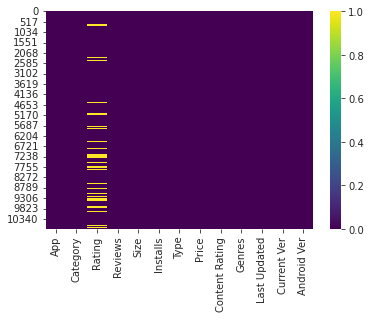

In [ ]:
#visualising null values
sns.heatmap(ps.isnull(), cmap='viridis')

#### **What did you know about your dataset?**

Rating has 1474 null values which contributes approx 14% of the data. Type and Content_Rating contributes approx 0.01% null values of the data. Current_Ver has 8 null values which contributes approx 0.08% of the data. Android_Ver contributes approx 0.03% null values of the data.
* We can replace the null values the aggregate (mean or median) and categorical variable with mode  of the remaining values in the all the column.

#### Filling the null values

In [ ]:
# Fill all missing values

ps['Rating'].fillna(ps['Rating'].mean(), inplace=True)
ps['Android Ver'].fillna(ps['Android Ver'].mode()[0], inplace=True)
ps['Type'].fillna(ps['Type'].mode()[0], inplace=True)
ps['Content Rating'].fillna(ps['Content Rating'].mode()[0], inplace=True)
ps['Current Ver'].fillna(ps['Current Ver'].mode()[0], inplace=True)

In [ ]:
# now check if there is any missing value present or not
ps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now we Clean Every column one by one and remove extra objects from them also change there data type

# Data manipulation and Handling Duplicate Data.

### Ratings

In [ ]:
# change its datatype
ps['Rating'] = pd.to_numeric(ps['Rating'], errors='coerce')
ps['Rating'].dtype

dtype('float64')

In [ ]:
# check unique value of Rating
ps['Rating'].unique()

array([ 4.1       ,  3.9       ,  4.7       ,  4.5       ,  4.3       ,
        4.4       ,  3.8       ,  4.2       ,  4.6       ,  3.2       ,
        4.        ,  4.19333832,  4.8       ,  4.9       ,  3.6       ,
        3.7       ,  3.3       ,  3.4       ,  3.5       ,  3.1       ,
        5.        ,  2.6       ,  3.        ,  1.9       ,  2.5       ,
        2.8       ,  2.7       ,  1.        ,  2.9       ,  2.3       ,
        2.2       ,  1.7       ,  2.        ,  1.8       ,  2.4       ,
        1.6       ,  2.1       ,  1.4       ,  1.5       ,  1.2       ,
       19.        ])

In [ ]:
ps['Rating'] = ps['Rating'].round(2)

<Axes: xlabel='Rating'>

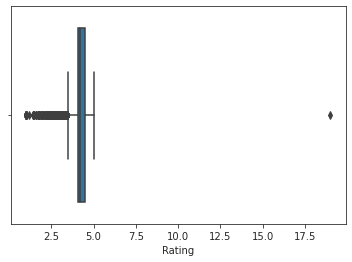

In [ ]:
#check outliers with boxplot 
sns.boxplot(x='Rating', data=ps)

Here we see that one outlier is present in rating which is more then 17.5 but here maximum rating is 5 so we have to remove this outlier 

In [ ]:
#list of data having rating greater than 5
ps[ps.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [ ]:
#deleting the outlier
ps.drop([10472], inplace=True)
#checking if the outlier is actually deleted
ps[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


### Size

In [ ]:
ps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
def converter(value):
  if 'M' in value:
    return float(value[:-1])
  elif 'K' in value:
    return float(value[:-1]/1024)
  else:
    return 0

In [ ]:
ps["Size"]= ps["Size"].apply(lambda x: converter(x))

In [ ]:
ps['Size'] =ps['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

In [ ]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Installs

In [ ]:
ps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
ps['Installs'] = ps.Installs.str.replace(",","")
ps['Installs'] = ps.Installs.str.replace("+","")
ps['Installs'] = ps.Installs.replace("Free",np.nan)
ps['Installs'] = ps['Installs'].astype(float)
ps['Installs'].dtype

dtype('float64')

### Reviews

In [ ]:
ps['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
ps['Reviews'] = ps.Reviews.replace("0.0",0)
ps['Reviews'] = ps.Reviews.replace("3.0M",3000000.0)
ps['Reviews'] = ps['Reviews'].astype(float)
ps['Reviews'].dtype

dtype('float64')

### Price

In [ ]:
ps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
ps['Price'] = ps.Price.replace("Everyone",np.nan)
ps['Price'] = ps.Price.str.replace("$","").astype(float)
ps['Price'].dtype

dtype('float64')

### Last Updated

In [ ]:
ps['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
ps['Last Updated'] = pd.to_datetime(ps['Last Updated'])
ps['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]



### Apps

In [ ]:
# Check whether there are any duplicate apps in the given playstore data 
ps['App'].duplicated().any()


True

In [ ]:
# List and count of number of duplicate apps
ps['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

Delete all duplicate apps

In [ ]:
# deleting the duplicating apps
ps.drop_duplicates(inplace=True)
ps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38.0,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4.0,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.19,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114.0,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


Important Points :



*   Several missing data values need to be replaced
*   All data types are objects that can be changed.


*   Data shows a maximum rating of 19, which is impossible since ratings range from 0 to 5.
*   Visually, rating has the highest number of null values.





In [ ]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  float64       
 4   Size            10357 non-null  float64       
 5   Installs        10357 non-null  float64       
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB


As we can see all the all the Data is cleaned , convert to numeric form is ready for visualization

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

##1.Checking Corelation 

In [ ]:
# find correlation
ps.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068510,0.045412,0.050646,-0.020584
Reviews,0.068510,1.000000,0.070572,0.634997,-0.009417
Size,0.045412,0.070572,1.000000,0.000390,-0.015129
Installs,0.050646,0.634997,0.000390,1.000000,-0.011147
Price,-0.020584,-0.009417,-0.015129,-0.011147,1.000000


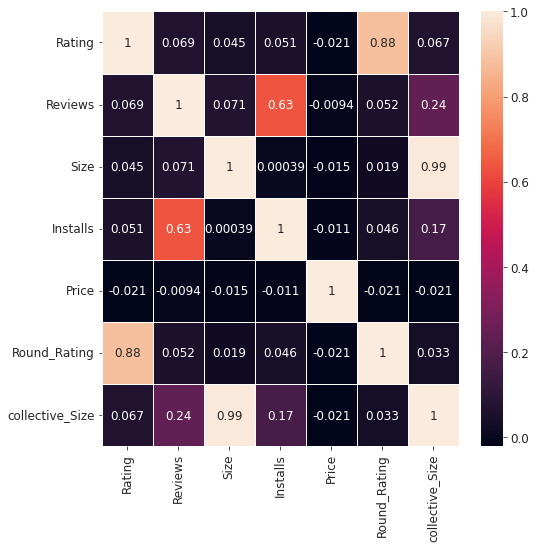

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(ps.corr(), annot=True, linewidths=.5,ax=ax)
plt.show()

## Observation 


We can see here that almost every variable in uncorrelated except **reviews**. Changes in reviews seems to have some effect on number of **installs** here



##2. Getting the average Rating of the Apps

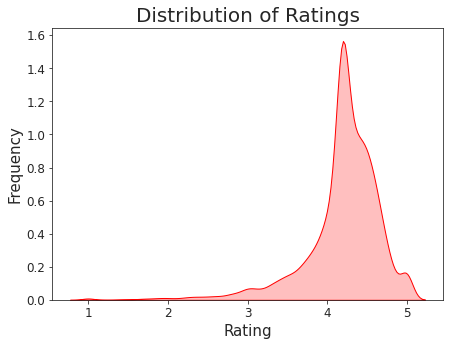

In [ ]:
#visualising the total Ratings from the dataframe
#Distribution of ratings
plt.figure(figsize=(7,5))
plt.xlabel("Rating",fontsize =15)
plt.ylabel("Frequency", fontsize = 15)
plt.title('Distribution of Ratings',size = 20)
x = sns.kdeplot(ps.Rating, color="r", shade = True)
plt.show()

## Observation

* We can observe a gradual increase in the ratings in the graphical representation

* We can see that the amongst all the apps most of the application have ratings between 4.1 to 4.4 

* Also can be said that as the frequency of app increases the rating also increase or visa-versa. 

In [ ]:
# lets ccombine the range of ratings
def summarize(ratings):
  if 1<=ratings<=1.9:
    return 1
  if 2<=ratings<=2.9:
    return 2
  if 3<=ratings<=3.9:
    return 3
  if 4<=ratings<=4.9:
    return 4
  if ratings==5:
    return 5

In [ ]:
ps['Round_Rating']=ps['Rating'].apply(lambda x : summarize(x))

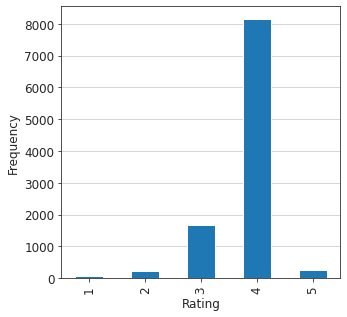

In [ ]:
plt.figure(figsize =(5,5))
ps['Round_Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')






*   We clearly see that over 8000 application rated as 4
*   we can say that most of the application rated in the range of 4 to 4.9



In [ ]:
ps.describe()

,Rating,Reviews,Size,Installs,Price,Round_Rating
count,10357.000000,1.035700e+04,10357.000000,1.035700e+04,10357.000000,10357.000000
mean,4.188177,4.059046e+05,18.137598,1.415776e+07,1.030800,3.806025
std,0.484020,2.696778e+06,22.149980,8.023955e+07,16.278625,0.532935
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000
25%,4.100000,3.200000e+01,2.700000,1.000000e+03,0.000000,4.000000
50%,4.200000,1.680000e+03,9.100000,1.000000e+05,0.000000,4.000000
75%,4.500000,4.641600e+04,26.000000,1.000000e+06,0.000000,4.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,5.000000


##3.Total number of application in each category

## Category

In [ ]:
ps.Category.value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

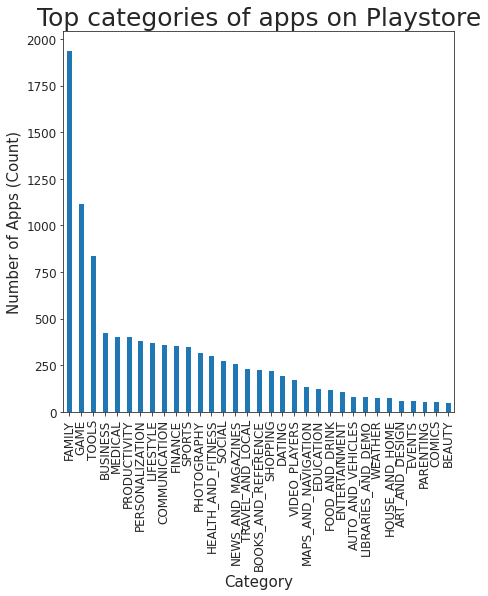

In [ ]:
x= ps.Category.value_counts()
plt.figure(figsize = (7,7))
plt.xlabel("Category",fontsize = 15)
plt.ylabel("Number of Apps (Count)",fontsize = 15)
plt.title("Top categories of apps on Playstore", fontsize = 25)
x.plot(kind ='bar')
plt.show()

Overview:


*   In the Google App Store,two categories Family and games have the highest number of applications to downloaded.

*   And on the contrary, parenting, beauty, comics are few of the categories with least number of applications to download in play store





##4.Check the number of installs in each Category

<Figure size 720x720 with 0 Axes>

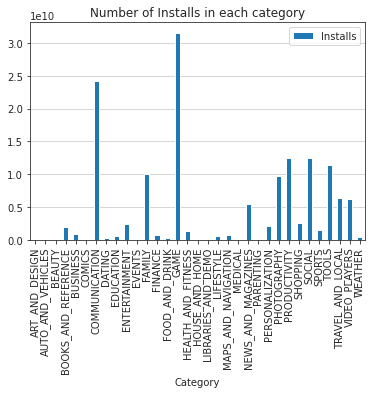

In [ ]:
#visualizing Number of installs in each category
plt.figure(figsize = (10,10))
installs_category = ps.groupby(['Category'])[['Installs']].sum()
installs_category.plot(kind='bar')
plt.grid(axis='y')
plt.title('Number of Installs in each category')
plt.show()

### Observation
As we can see game and communication apps have maximum installs 

family had the highest number of applications in category, the installation of those app as very minimal.

And as expected Beauty, comics are on a all time lowest in installs along with events, medical and many more

##5. Getting App Size Distribution

In [ ]:
ps['Size']=ps['Size'].round(1)

In [ ]:
def collective_size(size):
  if 1<=size<=10:
    return 10
  if 11<=size<=20:
    return 20
  if 21<=size<=30:
    return 30
  if 31<=size<=40:
    return 40 
  if 41<=size<=50:
    return 50
  if 51<=size<=60:
    return 60
  if 61<=size<=70:
    return 70
  if 71<=size<=80:
    return 80
  if 81<=size<=90:
    return 90
  if 91<=size<=100:
    return 100
  

In [ ]:
ps['collective_Size']= ps['Size'].apply(lambda x: collective_size(x) )

Text(0.5, 1.0, 'App size Distribution')

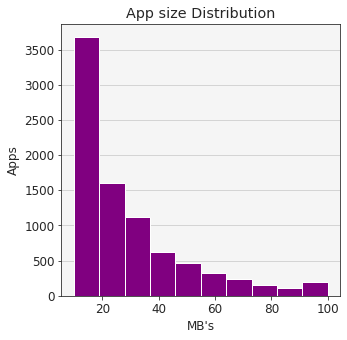

In [ ]:
plt.figure(figsize =(5,5))
ps['collective_Size'].plot(kind='hist',color='purple').set_facecolor('whitesmoke')
plt.grid(axis='y')
plt.xlabel("MB's")
plt.ylabel('Apps')
plt.title('App size Distribution')

We can see in the visualisation that 10-20 mb size has highest number on application in the Play store and the number gradually decreases when the app size increases resulting in that there are majority application in 10-40 mb size range.

##6. Check the number of installs on the basis of there size

Text(0, 0.5, 'No. of Installs')

<Figure size 576x576 with 0 Axes>

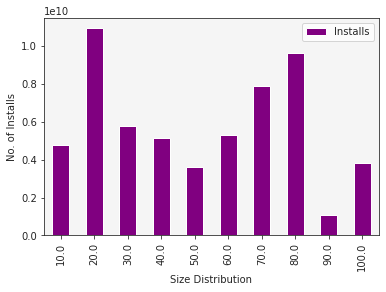

In [ ]:
plt.figure(figsize = (8,8))
installs_on_size=ps.groupby(['collective_Size'])[['Installs']].sum()
installs_on_size.plot(kind='bar',color='purple').set_facecolor('whitesmoke')
plt.xlabel('Size Distribution')
plt.ylabel('No. of Installs')


It is a quite interesting observation that although the app distribution in 10 mb bracket is on the higher side the installs is quite less here. 

On the other side the 70 -80 mb bracket has higher installs and the 20mb bracket has the highest installs of all. 


## 7.Lets check the app on the basis of price in playstore.(Free or Paid)

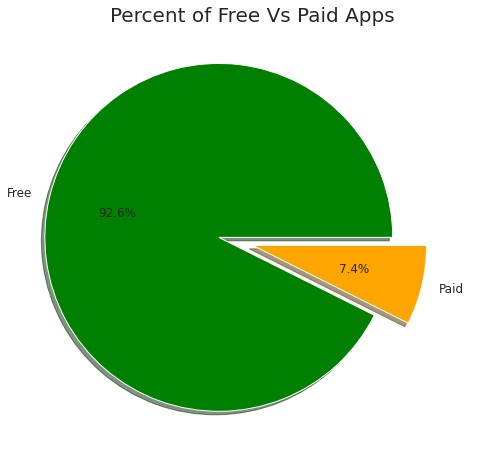

In [ ]:
from sys import ps1
plt.figure(figsize=(8,8))
labels = ps['Type'].value_counts(sort = True).index
sizes = ps['Type'].value_counts(sort = True)
colors = ["green","orange"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps',size = 20)
plt.show()

## Overview 


*   Now we can see that Free apps Installed Most which are approx 93%



##8. lets compare Category according to there Installs

In [ ]:
grp = ps.groupby('Category')
x = grp['Installs'].agg(np.mean)

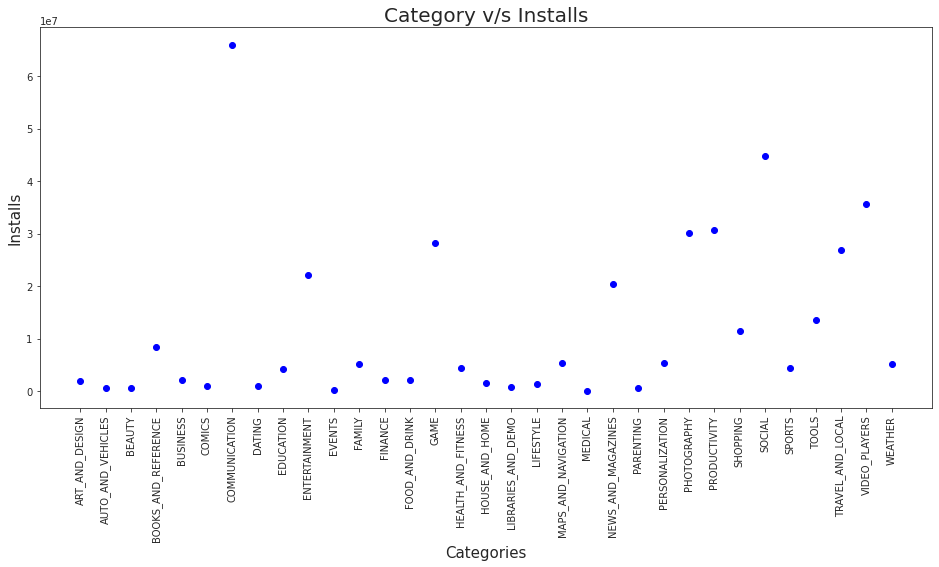

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(x, 'ro', color='blue')
plt.xticks(rotation=90)
plt.title('Category v/s Installs', fontsize=20)
plt.xlabel('Categories',fontsize =15)
plt.ylabel('Installs' ,fontsize =15)
plt.show()

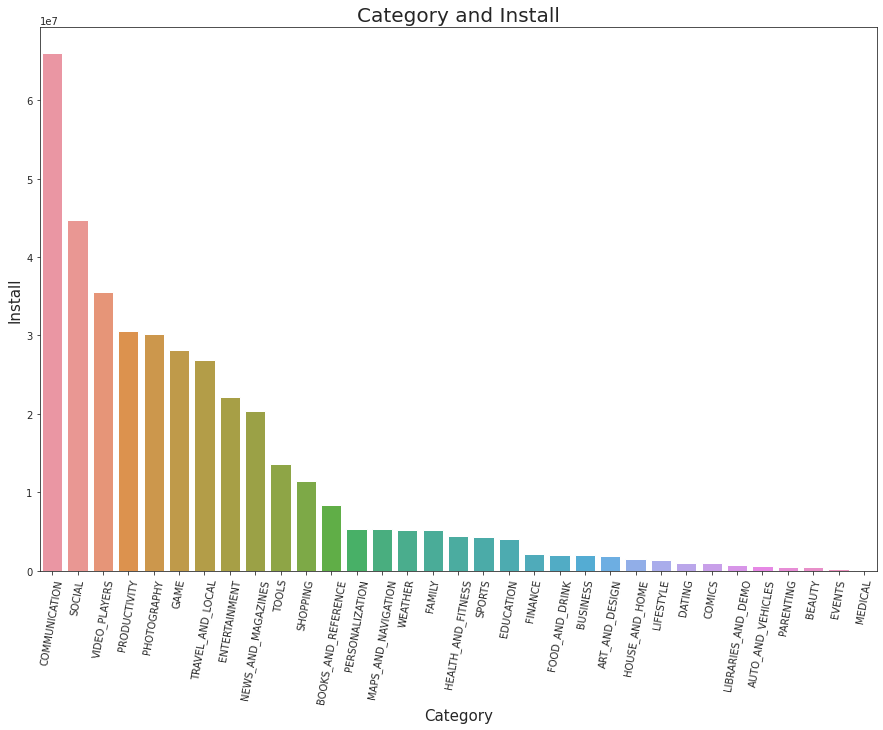

In [ ]:
category_list = list(ps['Category'].unique())
category_install = []
for i in category_list:
    x = ps[ps['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)
        
#sorting
data_category_install = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (data_category_install['install'].sort_values(ascending=False)).index.values
sorted_data =data_category_install.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'])
plt.xticks(rotation=80)
plt.xlabel("Category",fontsize =15)
plt.ylabel("Install" , fontsize = 15)
plt.title("Category and Install",fontsize =20)
plt.show()

Overview


*   We can see that Maximum install apps are in Communication



##9. Category and Rating

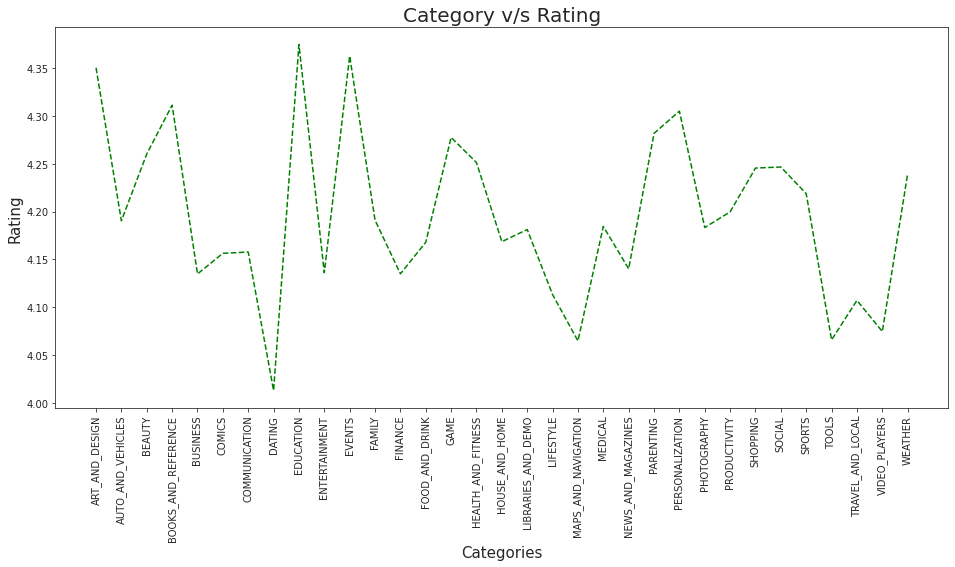

In [ ]:
y = grp['Rating'].agg(np.mean)
plt.figure(figsize=(16,7))
plt.plot(y, 'r--', color='g')
plt.xticks(rotation=90)
plt.title('Category v/s Rating', fontsize=20)
plt.xlabel('Categories',fontsize =15)
plt.ylabel('Rating',fontsize =15)
plt.show()

## Overview 


*   Highest ratings given in Education
*   Low ratings given in Dating



##10. Category and Reviews

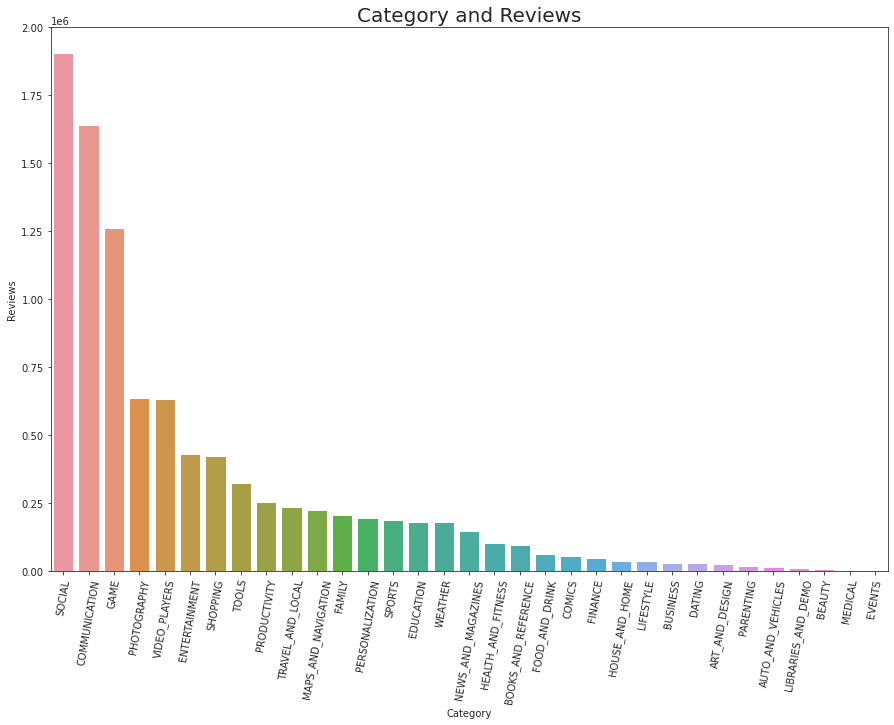

In [ ]:
category_list = list(ps['Category'].unique())
category_review = []
for i in category_list:
    x = ps[ps['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews",fontsize =20)
plt.show()

## Overview

*   Maximum Reviews are given in Social



##11. Review sentiments in all the app dataset

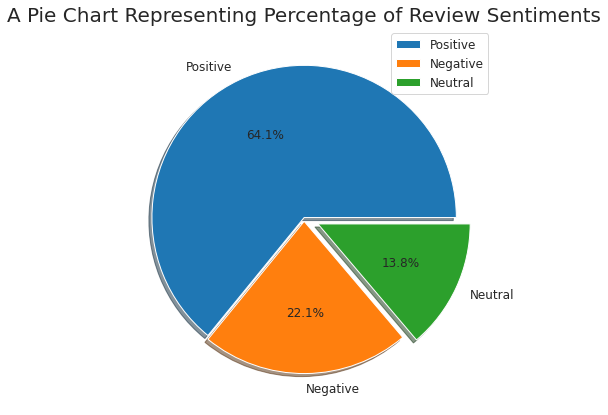

In [ ]:
plt.figure(figsize=(7,7))
slices=ur.Sentiment.value_counts()
labels=['Positive','Negative','Neutral']
explode=[0,0.025,0.1]
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(slices,labels=labels,explode=explode,autopct='%1.1F%%',shadow=True);
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.legend()
plt.show();

As we can see it from the pie charts there are 64.1 % of Positive sentiments, 22.1% of Negative sentiments, and 13.8% neutral sentiments.

##12.Let's see a more depth understanding of sentiment Polarity and Subjectivity.


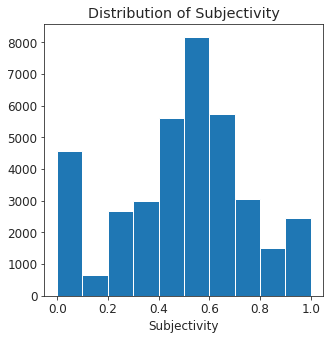

In [ ]:

plt.figure(figsize=(5,5))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(ur.Sentiment_Subjectivity.values)
plt.show();
     

It can be seen that the maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this, we can conclude that the maximum number of the audience give reviews to the applications, according to their experience.

##13.Does sentiments Polarity is proportional to sentiments subjectivity.

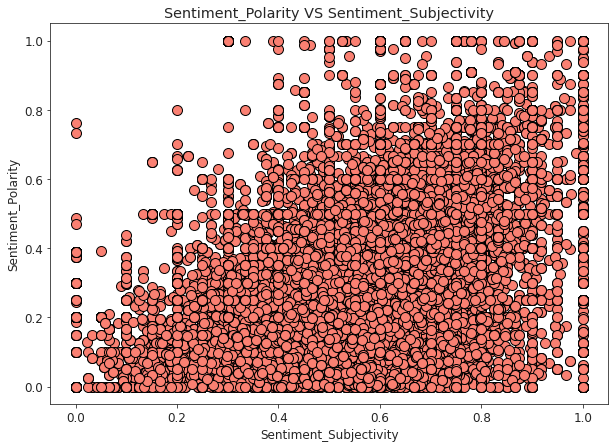

In [ ]:
plt.figure(figsize=(10,7))
y=ur["Sentiment_Polarity"].abs()
x=ur["Sentiment_Subjectivity"].abs()
plt.scatter(x,y,s=100,c="salmon",edgecolor="black")
plt.xlabel("Sentiment_Subjectivity")
plt.ylabel("Sentiment_Polarity")
plt.title("Sentiment_Polarity VS Sentiment_Subjectivity")
plt.show();

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior

In [ ]:
#correlation between sentiment polarity and sentiment subjectivity.
ur[['Sentiment_Polarity','Sentiment_Subjectivity']].dropna().corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261651
Sentiment_Subjectivity,0.261651,1.000000


## Overview 


*  We can see that Slightly positive correlation between columns



##14. Sentiment analysis of user reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

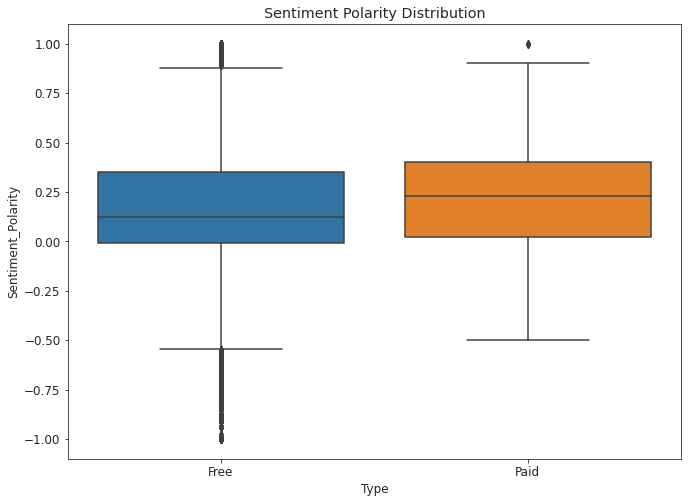

In [ ]:
# Join the two dataframes
merged_df = ps.merge(ur, on='App')

# Drop NA values from Sentiment columns
merged_df = merged_df.dropna(subset = ['Sentiment'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')



**Free apps receive a lot of harsh comments** which are indicated as outliers on the negative Y-axis.

Users are more lenient and tolerant while reviewing paid apps - moderate choice of words. They are never extremely negative while reviewing a paid app.




##15. Word Cloud

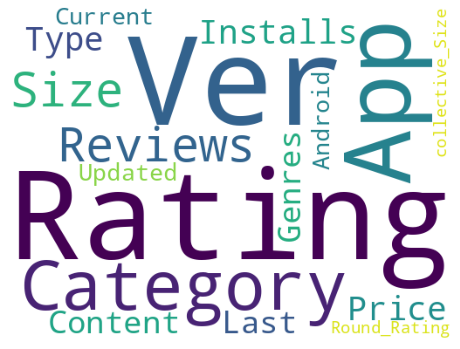

In [ ]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(ps))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

### WORDCLOUD - A quick look on reviews

In [ ]:
merged_df = pd.merge(ps, ur, on = "App", how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

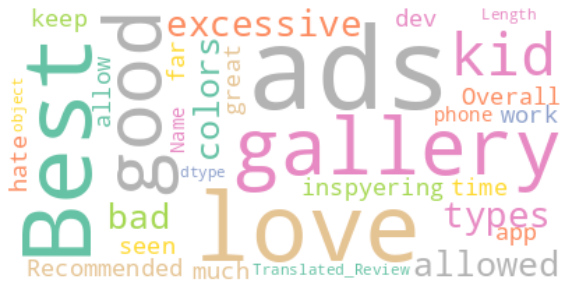

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=200, colormap="Set2")
# generate word cloud

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher']

#merged_df = merged_df.dropna(subset=['Translated_Review'])
merged_df['Translated_Review'] = merged_df['Translated_Review'].apply(lambda x: " ".join(x for x in str(x).split(' ') if x not in stop))
#print(any(merged_df.Translated_Review.isna()))
merged_df.Translated_Review = merged_df.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
merged_df.dropna(subset=['Translated_Review'], inplace=True)


free = merged_df.loc[merged_df.Type=='Free']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

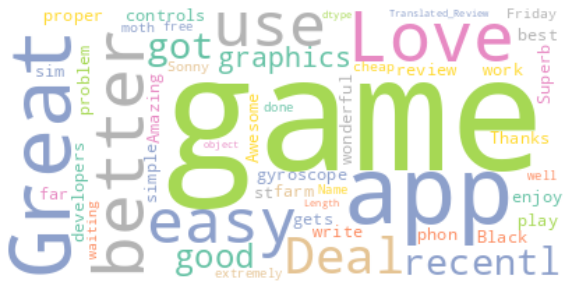

In [ ]:
paid = merged_df.loc[merged_df.Type=='Paid']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(paid)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.show()

   ** FREE APPS **
> 
**Negative words: ads, bad, hate**
>
**Positive words: good, love, best, great**

   ** PAID APPS **
> 
**Negative words: malware, problem**
>
**Positive words: great, love, easy**

### **Top 10 apps to find positive reviews**

In [ ]:
sentiment_app = ur[['App','Sentiment']].dropna()
sentiment_app = sentiment_app.value_counts().to_frame().reset_index()
positive = sentiment_app[sentiment_app['Sentiment']=='Positive'].sort_values(by=0,ascending=False)[:10]

Text(0.5, 1.0, 'Top 10 apps having most number of positive reviews')

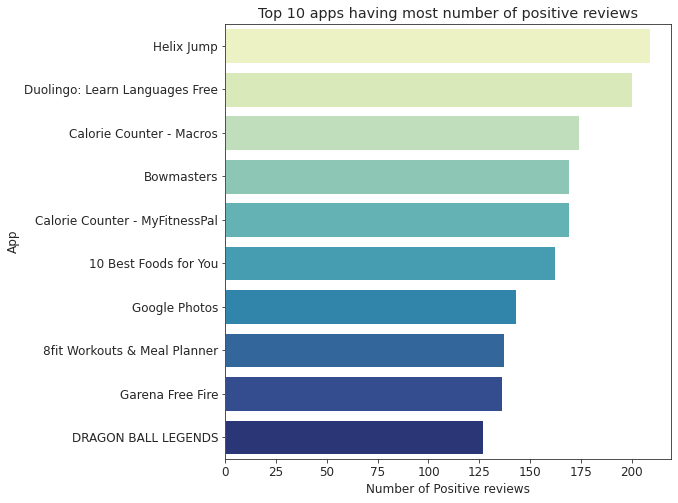

In [ ]:
sns.barplot(y="App", x=0, data=positive,palette='YlGnBu')
plt.ylabel('App')
plt.xlabel('Number of Positive reviews')
plt.title('Top 10 apps having most number of positive reviews')

#Conclusion

*  Data cleaning plays a vital role in accuracy and results before starting any kind of exploration.

*  As the largest distribution platform for building a global audience, Google Play has more than a billion active users in more than 190 countries. As a result, there is a hell of a lot of competition in the App market.

*  Visualizations make anything interesting with graphs, plots, charts, or maps as we can see from the many observations and conclusions that result from the data visualization.

*  With which the data can be easily understood and its role in the diverse world of the Play Store can be simplified.

*  Users are most likely to install apps from categories such as GAME, COMMUNICATION, and TOOL, despite the fact that there are twice as many apps available in these categories as those from FAMILY. Apps that provide entertainment or assistance to users are most likely to be popular due to their nature.


*  Furthermore, it is also possible to say that most apps have a higher number of installs or reviews that give them a good rating and most apps have a rating of 4 (8000 apps). Moreover, a few minutes difference in size and price do not significantly affect apps with a good rating and review, even if their app size is large.Because of the free in-charges, we get more ratings and installations.

*  Also, it can be seen from the chart that the sentiments play important role  and maximum number of sentiment which are positive around (64.1 %) lies between subjectivity 0.4 to 0.7.According to their experience, the majority of the audience gives reviews to the applications.

* As, we can see that, why exploring data is important before starting to build ML models.

* As a conclusion, we learnt that the current trends in the Android market are mostly from these categories which assisting, communicating or entertaining apps.





                                
                                
                                                          Thank You
                                

